In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

#Size of our input images
SIZE = 128

#############################################################################
#Define generators for training, validation and also anomaly data.

batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)



In [3]:
train_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/train',
    
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )



Found 1016 images belonging to 5 classes.


In [4]:
validation_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/validation/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )



Found 405 images belonging to 2 classes.


In [13]:
normal_generator = datagen.flow_from_directory(
    '/home/hamoud/Downloads/archive (1)/Pure pistachios/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 201 images belonging to 1 classes.


In [7]:
#Define the autoencoder. 
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds. 



#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,067 (203.39 KB)

 Trainable params: 52,067 (203.39 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Fit the model. 
history = model.fit(
        train_generator,
        steps_per_epoch= 50 // batch_size,
        epochs=500,
        validation_data=validation_generator,
        validation_steps=25// batch_size,
        shuffle = True)

Epoch 1/500


/home/hamoud/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715596660.352759   90413 service.cc:145] XLA service 0x75b490002290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715596660.352788   90413 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce MX130, Compute Capability 5.0
2024-05-13 11:37:40.435503: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-13 11:37:40.654643: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-05-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - loss: 0.0681 - mse: 0.0681

2024-05-13 11:38:46.803984: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=2} for conv (f32[21,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[21,3,128,128]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-13 11:38:46.815902: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.012026196s
Trying algorithm eng12{k11=2} for conv (f32[21,64,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[21,3,128,128]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id

1/1 ━━━━━━━━━━━━━━━━━━━━ 79s 79s/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0650 - mse: 0.0650 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0502 - val_mse: 0.0502
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0493 - val_mse: 0.0493
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0487 - 

2024-05-13 11:40:17.629220: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng35{k2=2,k3=0} for conv (f32[24,3,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,64,128,128]{3,2,1,0}, f32[3,64,3,3]{3,2,1,0}, f32[3]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-13 11:40:17.975465: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.346355991s
Trying algorithm eng35{k2=2,k3=0} for conv (f32[24,3,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,64,128,128]{3,2,1,0}, f32[3,64,3,3]{3,2,1,0}, f32[3]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_qu

1/1 ━━━━━━━━━━━━━━━━━━━━ 50s 50s/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 18/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 19/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 20/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 21/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 22/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 23/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 24/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 25/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0

2024-05-13 11:42:07.173107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:42:07.173151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/hamoud/miniconda3/envs/tf/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 34/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 35/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 36/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 37/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 38/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 39/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 40/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 41/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0091 - mse: 0.0091 - val_l

2024-05-13 11:44:43.266677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:44:43.266717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-13 11:44:43.266738: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 67/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 68/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 69/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 70/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 71/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 72/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 73/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 74/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0049 - mse: 0.0049 - val_l

2024-05-13 11:47:19.123875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:47:19.123916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 100/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 101/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 102/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 103/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 104/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 105/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 106/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 107/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0042 - mse: 0.0042

2024-05-13 11:49:55.060081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:49:55.060142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-13 11:49:55.060210: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 133/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 134/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 135/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 136/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 137/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 138/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 139/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 140/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0039 - mse: 0.0039

2024-05-13 11:52:31.937613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:52:31.937659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 166/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 167/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 168/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 169/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 170/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 171/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 172/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 173/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037

2024-05-13 11:55:07.824623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:55:07.824667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-13 11:55:07.824706: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 199/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 200/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 201/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 202/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 203/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 204/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 205/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 206/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036

2024-05-13 11:57:43.728341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 11:57:43.728385: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637
2024-05-13 11:57:43.728414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 232/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 233/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 234/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 235/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 236/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 237/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 238/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 239/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036

2024-05-13 12:00:19.411804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:00:19.411842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 265/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 266/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 267/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 268/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 269/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 270/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 271/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 272/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035

2024-05-13 12:02:55.079868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:02:55.079897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-13 12:02:55.079916: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637
2024-05-13 12:02:55.079937: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3781568273820015913


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 298/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 299/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 300/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 301/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 302/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 303/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 304/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 305/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034

2024-05-13 12:05:30.722310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:05:30.722339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 331/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 332/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 333/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 334/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 335/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 336/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 337/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 338/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034

2024-05-13 12:08:07.414292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:08:07.414325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-13 12:08:07.414344: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 364/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 365/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 366/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 367/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 368/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 369/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 370/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 371/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034

2024-05-13 12:10:44.225851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:10:44.225882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-13 12:10:44.225898: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637
2024-05-13 12:10:44.225913: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3781568273820015913


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 397/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 398/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 399/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 400/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 401/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 402/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 403/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 404/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033

2024-05-13 12:13:20.624248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:13:20.624295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-13 12:13:20.624315: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10914934649585263637
2024-05-13 12:13:20.624332: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3781568273820015913


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 430/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 431/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 432/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 433/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 434/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 435/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 436/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 437/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033

2024-05-13 12:15:56.015540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:15:56.015605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 463/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 464/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 465/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 466/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 467/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 468/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 469/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 470/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033

2024-05-13 12:18:33.554839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-13 12:18:33.554905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0000e+00 - mse: 0.0000e+00 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 496/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 497/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 498/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 499/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 500/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032


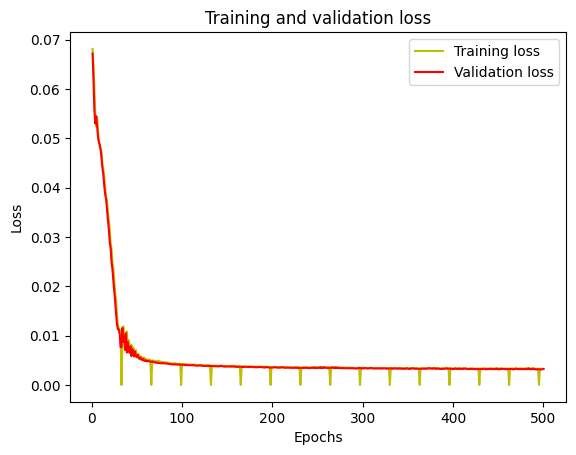

In [9]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
for i in range(len(train_generator)):
    data = train_generator[i]  # Get the next batch
    data_batch.append(data[0])


predicted = model.predict(data_batch[0])  #Predict on the first batch of images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


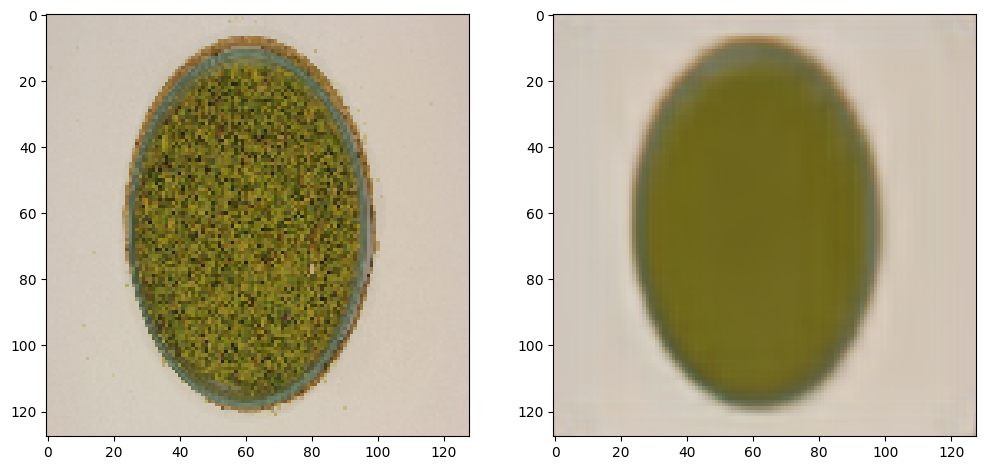

In [11]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [14]:
# Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate(validation_generator)
normal_error = model.evaluate(normal_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the pure data is: ", normal_error)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - loss: 0.0032 - mse: 0.0032
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0032 - mse: 0.0032
Recon. error for the validation (normal) data is:  [0.00321228732354939, 0.0032122868578881025]
Recon. error for the pure data is:  [0.003166148904711008, 0.003166148904711008]


In [17]:
#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image. 
#The compressed output is then used to calculate the KDE

# Build the encoder model
encoder_model = Sequential()

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))

# Set the weights for the first Conv2D layer
encoder_model.layers[0].set_weights(model.layers[0].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Set the weights for the second Conv2D layer
encoder_model.layers[2].set_weights(model.layers[2].get_weights())

# Add the MaxPooling2D layer
encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Add the Conv2D layer without weights
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

# Set the weights for the third Conv2D layer
encoder_model.layers[4].set_weights(model.layers[4].get_weights())

# Summary of the encoder model
encoder_model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 16)     │         4,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,880 (97.19 KB)

 Trainable params: 24,880 (97.19 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

# Get encoded output of input images = Latent space
encoded_images = encoder_model.predict(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape  # Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1] * encoder_output_shape[2] * encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step


In [20]:
#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)


In [21]:
#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

In [24]:
# Get a batch of images for each uninfected (normal) and anomaly (parasitized) images
train_batch = next(train_generator)
normal_batch = next(normal_generator)

# Extract images from the batch
train_images = train_batch[0]
normal_images = normal_batch[0]

# Calculate density and reconstruction error for uninfected (normal) and anomaly (parasitized) images
uninfected_values = calc_density_and_recon_error(train_images)
normal_values = calc_density_and_recon_error(normal_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - loss: 0.0052 - mse: 0.0052
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0055 - mse: 0.0055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0048 - mse: 0.0048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054 - mse: 0.0054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0058 - mse: 0.0058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054 - mse: 0.0054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - mse: 0.0054
1/

In [66]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.004 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.Resampling.LANCZOS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is pure")
        
    else:
        print("The image is NOT pure")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054 - mse: 0.0054
The image is pure
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0048 - mse: 0.0048
The image is pure


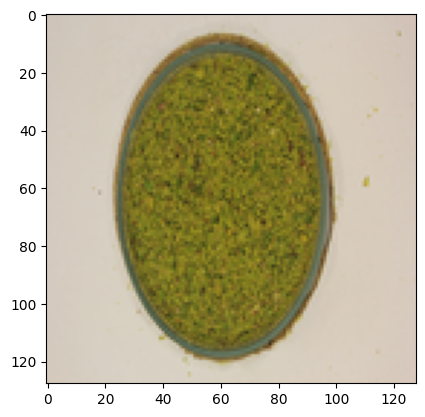

In [69]:
import glob
import random
import os

# Anomaly image verification
para_file_paths = [path for path in glob.glob('/home/hamoud/Desktop/pure/*') if os.path.isfile(path)]
if para_file_paths:
    num = random.randint(0, len(para_file_paths) - 1)
    check_anomaly(para_file_paths[num])

# Good/normal image verification
uninfected_file_paths = [path for path in glob.glob('/home/hamoud/Desktop/train/*') if os.path.isfile(path)]
if uninfected_file_paths:
    num = random.randint(0, len(uninfected_file_paths) - 1)
    check_anomaly(uninfected_file_paths[num])
